<a href="https://colab.research.google.com/github/PouyaZr/Detect_Fire_KNN/blob/master/KNN_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Detect Fire --> KNN

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download phylake1337/fire-dataset

 97% 377M/387M [00:08<00:00, 51.7MB/s]
100% 387M/387M [00:08<00:00, 47.4MB/s]


In [ ]:
!ls

fire-dataset.zip  kaggle.json  sample_data


In [ ]:
import zipfile

ZIP = zipfile.ZipFile('/content/fire-dataset.zip', 'r')
ZIP.extractall()
ZIP.close()

In [ ]:
!ls

fire_dataset  fire-dataset.zip	kaggle.json  sample_data


In [ ]:
!rm -rf fire-dataset.zip

In [ ]:
!ls

fire_dataset  kaggle.json  sample_data


In [ ]:
import cv2
import glob
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from joblib import dump

In [165]:
data = []
labels = []

i = 0
for item in glob.glob('fire_dataset/*/*'):

  i += 1

  img = cv2.imread(item)
  try:
    r_img = cv2.resize(img, (32, 32)).flatten()
  except:
    continue
  data.append(r_img)

  label = item.split('/')[-1]
  label = label.split('.')[0]

  labels.append(label)

  if i % 100 == 0:
    print(f"[INFO]: {i}/1000 processed")

data = np.array(data)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
out = clf.score(X_test, y_test)

print(f"Accuaracy: {out*100:.2f}")

[INFO]: 100/1000 processed
[INFO]: 200/1000 processed
[INFO]: 300/1000 processed
[INFO]: 400/1000 processed
[INFO]: 500/1000 processed
[INFO]: 600/1000 processed
[INFO]: 700/1000 processed
[INFO]: 800/1000 processed
[INFO]: 900/1000 processed
Accuaracy: 86.50


In [166]:
dump(clf, "clf_KNN.joblib")

['clf_KNN.joblib']

### Usage KNN

In [ ]:
from joblib import load
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [167]:
clf = load("clf_KNN.joblib")

In [ ]:
ZIP = zipfile.ZipFile('/content/Val_img.zip', 'r')
ZIP.extractall()
ZIP.close()

In [ ]:
!rm -rf Val_img.zip

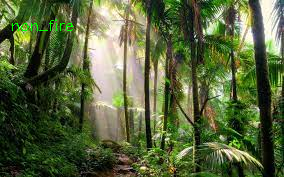

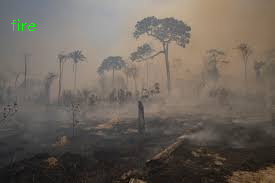

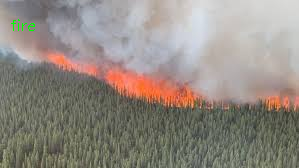

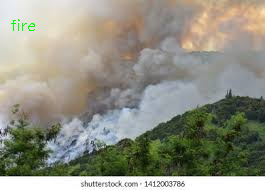

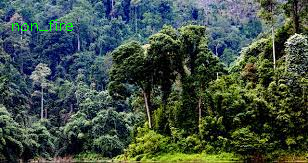

In [168]:
for item in glob.glob('Val_img/*'):

  img = cv2.imread(item)
  r_img = cv2.resize(img, (32, 32)).flatten()
  
  out = clf.predict([r_img])[0]
  out = out.split('/')[-1]

  cv2.putText(img, out, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
              0.5, (0, 255, 0), 1)
  
  cv2_imshow (img)